# ***CoderHouse Proyecto Final: Data Science***

El proyecto aborda un modelo de negocio de hospedaje en una zona de turismo europea. Este hotel exclusivo se distingue por ofrecer una experiencia de alojamiento de alta calidad, basada en la excelencia de sus servicios y la comodidad de sus instalaciones.<br>El modelo de negocio se sustenta en la diversificación de fuentes de ingresos, que van más allá de la simple renta de habitaciones. Esto incluye la organización de eventos corporativos, bodas y celebraciones especiales, así como la oferta de paquetes turísticos completos que incluyen alojamiento, transporte y actividades recreativas.

### Problematica

La gerencia del hotel observa en el periodo que comprende desde mediados del año 2017 hasta finales del 2018 una sólida presencia de reservas canceladas, lo que implica una perdida de nuevos clientes y de potenciales reservas efectivas. 
Desde el área de toma de decisiones se deniega la posibilidad de cobrar un monto, a modo de garantia, por la reserva de los servicios contratados, ya que esto genera un gasto inmediato para el cliente al momento de planificar su viaje, por este motivo la empresa acude a nuestro de servicio de análisis de datos a fines de poder detectar cuales son las reservas que son candidatas a ser canceladas.

### Hipotesis

Considerando el modelo de negocio planteado y su desafío de predecir cancelaciones de reservas, se propone la siguiente hipótesis: ***Existe un conjunto de variables que pueden ser identificadas y ponderadas para predecir con precisión qué reservas serán canceladas***. Esta investigación se centrará en identificar qué variables tienen mayor influencia en la probabilidad de cancelación de una reserva. A través del análisis de estas variables y su impacto en la cancelación de reservas, se plantearán preguntas como: ***¿Qué factores específicos contribuyen significativamente a la probabilidad de cancelación?*** ***¿Cómo pueden estas variables ser utilizadas para desarrollar un modelo predictivo robusto?*** Al responder estas preguntas, se espera obtener información crucial para la toma de decisiones.

### Diccionario de datos

- Booking_ID: Identificador único de registro
- num_adults: Número de adultos en la reserva
- num_children: Número de niños en la reserva
- weekend_nights: Número de noches de semana reservados
- week_nights: Número de noches de fin de semana reservados
- meal_plan: Plan de comida seleccionado
- car_parking: Solicitud de espacio de estacionamiento (0=No; 1=Si)
- room_type: Tipo de habitación seleccionada en la reserva
- lead_time: Número de días de anticipación con que se realiza la reserva
- arrival_year: Año de la fecha de arribo al hotel
- arrival_month: Mes de la fecha de arribo al hotel
- arrival_date: Dia de la fecha de arribo al hotel
- mkt_segment: Medio por el cual se realiza la reserva
- repeated_guest: Si el cliente es un cliente regular (0=No; 1=Si)
- num_prev_cancellations: Número de reservas canceladas previamente
- num_prev_not_canceled: Número de reservas no canceladas previamente
- avg_price_room: Precio promedio de la habitación seleccionada en la reserva
- num_sp_requests: Número de solicitudes extra en la reserva
- booking_status: Estado de la reserva (No cancelada/Cancelada)

## Librerias y Funciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from Functions import Correlations, Metrics, DescrStat

## Conociendo los datos

### Exploracion del dataset

In [2]:
df = pd.read_csv('Hotel_Reservations.csv')
df.head(3)

,Booking_ID,num_adults,num_children,weekend_nights,week_nights,meal_plan,car_parking,room_type,lead_time,arrival_year,arrival_month,arrival_date,mkt_segment,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [3]:
print(f'La cantidad de filas y columnas es: {df.shape}\n\n')
df.info()

La cantidad de filas y columnas es: (36275, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Booking_ID              36275 non-null  object 
 1   num_adults              36275 non-null  int64  
 2   num_children            36275 non-null  int64  
 3   weekend_nights          36275 non-null  int64  
 4   week_nights             36275 non-null  int64  
 5   meal_plan               36275 non-null  object 
 6   car_parking             36275 non-null  int64  
 7   room_type               36275 non-null  object 
 8   lead_time               36275 non-null  int64  
 9   arrival_year            36275 non-null  int64  
 10  arrival_month           36275 non-null  int64  
 11  arrival_date            36275 non-null  int64  
 12  mkt_segment             36275 non-null  object 
 13  repeated_guest          36275 non-null  i

In [4]:
df.describe()

,num_adults,num_children,weekend_nights,week_nights,car_parking,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Data Wrangling

En esta seccion se realizara la limpieza del dataset de datos nulos, atipicos y valores absurdos para las reglas de negocio. Tambien se crearan nuevas variables utilizando las que ya estan disponible en pos de obtener nuevas variables y probar su poder predictivo.<br>La seccion se encuentra dividida en subsecciones con el nombre de la variable que se trata en cada una de estas divisiones. 

### Variable ***num_adults***

Esta variable describe la cantidad de personas adultas que componen la reserva y que se alojaran en el hotel. Se puede divisar con el metodo ***describe()*** en la celda posterior que el valor minimo de la variable es cero y segun las reglas de negocio de este hotel, en las reservas debe haber al menos un adulto (>= 18 años) por reserva, los menores no pueden reservar por si solos. En el caso de que la reserva solo tenga menores, se interpreta el dato como erroneo y se procederá a eliminarlo.

In [5]:
df.num_adults.describe()

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: num_adults, dtype: float64

In [6]:
#CANTIDAD DE RESERVAS SIN ADULTOS
print(f'La cantidad de reservas sin adultos es: {df.loc[df.num_adults < 1].shape[0]}')

La cantidad de reservas sin adultos es: 139


In [7]:
#SE ELIMINAN DATOS ERRONEOS
df = df.loc[df.num_adults >= 1]
print(f'La cantidad de reservas sin adultos despues de la modificacion es: {df.loc[df.num_adults < 1].shape[0]}')

#Se imprime informacion del dataframe despues de eliminar registros
print(f'La cantidad de filas y columnas del dataframe despues de la modificacion es: {df.shape}')

La cantidad de reservas sin adultos despues de la modificacion es: 0
La cantidad de filas y columnas del dataframe despues de la modificacion es: (36136, 19)


### Variable ***num_children***

Esta variable describe la cantidad de niños menores que componen la reserva y que se alojaran en el hotel. Se puede divisar con el metodo ***describe()*** en la celda posterior, que la variable muestra el valor **cero** para el tercer cuartil, lo que da la pauta de que en el 75% de los datos en esta variable es cero y su valor maximo es 10, como el valor maximo se aleja bastante del 3er cuartil, veremos si este valor es un outlier.

In [8]:
df.num_children.describe()

count    36136.000000
mean         0.097880
std          0.385097
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: num_children, dtype: float64

In [9]:
#SE MUESTRAN LA CANTIDAD DE RESERVAS SEGUN LOS MENORES EN ELLA
for item in range(0,11):
    print(f'La cantidad de reservas con {item} niños es: {df.loc[df.num_children == item].shape[0]}')

La cantidad de reservas con 0 niños es: 33577
La cantidad de reservas con 1 niños es: 1617
La cantidad de reservas con 2 niños es: 925
La cantidad de reservas con 3 niños es: 14
La cantidad de reservas con 4 niños es: 0
La cantidad de reservas con 5 niños es: 0
La cantidad de reservas con 6 niños es: 0
La cantidad de reservas con 7 niños es: 0
La cantidad de reservas con 8 niños es: 0
La cantidad de reservas con 9 niños es: 2
La cantidad de reservas con 10 niños es: 1


Como se puede observar hay valores atipicos que se alejan fuertemente de los datos, debido a la poca significancia cuantitativa de estos datos atipicos, se decide eliminar las observaciones que los contienen.

In [10]:
#SIGNIFICANCIA PORCENTUAL DE LOS DATOS A ELIMINAR
perc = (df.loc[df.num_children >3].shape[0]/df.shape[0])*100
print(f'Los datos a eliminar representan el {perc:.3f}% de los datos')

#SE ELIMINAN DATOS AOUTLIERS
df = df.loc[df.num_children <= 3]

Los datos a eliminar representan el 0.008% de los datos


In [11]:
df.num_children.describe()

count    36133.000000
mean         0.097113
std          0.375780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: num_children, dtype: float64

### Variable ***total_guests***

En este caso se creara una nueva variable que representa la cantidad total de personas detalladas en la reserva. Esta resulta de sumar las variables ***num_children*** y ***num_adults***

In [12]:
#TRANSFORMACION DE VARIABLES TOTAL_CHILDREN y TOTAL_ADULTS
df.loc[: ,'total_guests'] = df.apply(lambda x: x.num_adults + x.num_children, axis=1)

#INFORMACION DE LA NUEVA VARIABLE
df.total_guests.describe()

count    36133.000000
mean         1.949188
std          0.646177
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: total_guests, dtype: float64

### Variables ***weekend_nights*** y ***week_nights***

Estas variables describen la cantidad de dias de fin de semana y dias de semana respectivamente por la cual se reserva la habitacion del hotel. A partir de esto se generará una nueva variable que describa la cantidad de dias totales por la cual se reseva.

In [13]:
#SE CREA DATAFRAME ADICIONAL PARA CREAR NUEVA VARIABLE
booking_nights = df[['weekend_nights','week_nights']].copy()

#SE CREA NUEVA VARIABLE EN BASE A LAS EXISTENTES
booking_nights.loc[:,'total_nights'] = booking_nights.apply(lambda x: x.weekend_nights + x.week_nights, axis=1)

#INFORMACION DE LA NUEVA VARIABLE
booking_nights.total_nights.describe()

count    36133.000000
mean         3.013782
std          1.785856
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: total_nights, dtype: float64

En la informacion que se muestra de la nueva variable se puede observar que el valor minimo en ella es **cero**, lo cual no seria valido. Por este motivo es que se realizara un analisis para aplicar alguna tecnica de imputacion para los valores atipicos mencionados.

In [14]:
#INFORMACION DE LA VARIABLE
DescrStat.get_var_data(booking_nights.total_nights)

median       3.0000
mean         3.0138
mode         3.0000
std          1.7859
variance     3.1893
skew         2.2354
kurtosys    12.2587
dtype: float64

In [15]:
#IMPUTACION DE DATOS ATIPICOS
booking_nights.loc[booking_nights.total_nights == 0, 'total_nights'] = booking_nights.total_nights.median()

#INFORMACION DE LA VARIABLE DESPUES DE IMPUTAR
DescrStat.get_var_data(booking_nights.total_nights)

median       3.0000
mean         3.0203
mode         3.0000
std          1.7803
variance     3.1696
skew         2.2558
kurtosys    12.3979
dtype: float64

Como se observa en los coeficientes de dispersion, la imputacion por la **mediana** no ha impactado de manera violenta en la distribucion de la variable, es por ello que se conserva este cambio. Ahora solo queda por unir esta nueva variable al **Dataframe** principal.

In [16]:
#SE INSERTA LA NUEVA VARIABLE AL DATAFRAME PRINCIPAL
position = df.columns.get_loc('week_nights')+1
df.insert(column='total_nights', loc=position, value=booking_nights.total_nights)

#SE LIBERAN RECURSOS
del booking_nights

#INFORMACION
df.total_nights.describe()

count    36133.000000
mean         3.020258
std          1.780346
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: total_nights, dtype: float64

### Variables ***arrival_year***, ***arrival_month*** y ***arrival_date***

Estas variables describen el año, mes y dia de arribo respectivamente. Lo que se hara en esta seccion es crear una variable especifica para describir la fecha y con esta informacion obtener la estacion del año para la cual se realizo la reserva

In [17]:
#PRiMERO SE REALIZARA UN CAMBIO DE NOMBRE A FINES DE EVITAR AMBIGUEDAD
df.rename(columns={'arrival_date':'arrival_day'}, inplace=True)

#SE CREA DATAFRAME COMPLEMETARIO PARA RELIZAR LOS CAMBIOS
dates = df[['arrival_year','arrival_month', 'arrival_day']].copy()
dates.columns = ['y','m','d']

#SE GENERA LA NUEVA VARIABLE
dates.loc[:,'arrival_date'] = dates.apply(lambda x: str(x.y) + '-' + str(x.m) + '-' + str(x.d), axis=1)
dates.head(3)

,y,m,d,arrival_date
0,2017,10,2,2017-10-2
1,2018,11,6,2018-11-6
2,2018,2,28,2018-2-28


Si bien ya se ha obtenido la columna de fecha, esta tiene un tipo de dato ***str***, lo cual no es nuestro objetivo. Por ello se transformaran estos datos a tipo ***Datetime*** lo que va a generar algunos datos nulos que manejaremos posteriormente

In [18]:
#SE CONVIERTE LA VARIABLE ARRIVAL_DATE EN DATETIME
dates.arrival_date = pd.to_datetime(dates.arrival_date, format="%Y-%m-%d",yearfirst=True, errors='coerce')
dates.arrival_date.info()

<class 'pandas.core.series.Series'>
Index: 36133 entries, 0 to 36274
Series name: arrival_date
Non-Null Count  Dtype         
--------------  -----         
36096 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 564.6 KB


In [19]:
#OBSERVACION DE DATOS NULOS
dates.loc[dates.arrival_date.isna()].head(3)

,y,m,d,arrival_date
2626,2018,2,29,NaT
3677,2018,2,29,NaT
5600,2018,2,29,NaT


Como se puede observar los datos ***NaN*** que se generaron al convertir de ***string*** a ***datetime*** fueron producidos por la fecha ***2018-02-29*** una fecha correspondiente a un año biciesto, pero justamente el año 2018 no lo fue. Para este caso en particular reemplazaremos las fechas conflictivas con la fecha del dia anterior.

In [20]:
#CORRECCION DEL ERROR
condition = (dates.y == 2018) & (dates.m == 2) & (dates.d == 29)
dates.loc[condition, 'd'] = 28

#CONVERSION DE TIPO
dates.loc[dates.arrival_date.isna(), 'arrival_date'] = dates.apply(lambda x: pd.to_datetime( str(x.y) + '-' + str(x.m) + '-' + str(x.d),
                                                                                             format="%Y-%m-%d",
                                                                                             yearfirst=True),
                                                                                             axis=1)

#INFORMACION
dates.arrival_date.info()

<class 'pandas.core.series.Series'>
Index: 36133 entries, 0 to 36274
Series name: arrival_date
Non-Null Count  Dtype         
--------------  -----         
36133 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.6 MB


#### Variable ***arrival season***

Como se mencion anteriormente, se dara lugar a la creacion de esta variable, que refiere la estacion del año para la cual se realiza la reserva.

In [21]:
#CREANDO ESTACIONES DEL AÑO (EUROPA)

#SE CREAN VARIABLES CONDICIONALES
is_summer = ((dates.m == 6) & (dates.d >= 21) | (dates.m == 7) | (dates.d == 8) | (dates.m == 9) & (dates.d <= 22))
is_autumn = ((dates.m == 9) & (dates.d >= 23) | (dates.m == 10) | (dates.d == 11) | (dates.m == 12) & (dates.d <= 20))
is_winter = ((dates.m== 12) & (dates.d >= 21) | (dates.m == 1) | (dates.d == 2) | (dates.m == 3) & (dates.d <= 20))

#SE CREA NUEVA VARIABLE
dates["arrival_season"] = "spring"
dates.loc[is_summer, "arrival_season"] = "summer"
dates.loc[is_autumn, "arrival_season"] = "autumn"
dates.loc[is_winter, "arrival_season"] = "winter"

dates.head(3)

,y,m,d,arrival_date,arrival_season
0,2017,10,2,2017-10-02,winter
1,2018,11,6,2018-11-06,spring
2,2018,2,28,2018-02-28,spring


Con el objetivo logrado parcialmente, ahora es momento de deshacerse de las columnas que no nos sirven en del dataframe principal y agregar las nuevas columnas que se consiguieron

In [22]:
#SE IGUALAN LAS COLUMNAS DEL DATAFRAME PRINCIPAL CON EL COMPLEMENTARIO LIBRE DE ERRORES
df.arrival_month = dates.m
df.arrival_day = dates.d

#SE INSERTA LA VARIABLE NUEVA EN EL DATRAFRAME PRINCIPAL
position = df.columns.get_loc('arrival_day')+1
df.insert(column='arrival_season', loc=position, value=dates.arrival_season)

#SE LIBERAN RECURSOS
del dates

df.head(3)

,Booking_ID,num_adults,num_children,weekend_nights,week_nights,total_nights,meal_plan,car_parking,room_type,lead_time,...,arrival_day,arrival_season,mkt_segment,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests,booking_status,total_guests
0,INN00001,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,224,...,2,winter,Offline,0,0,0,65.00,0,Not_Canceled,2
1,INN00002,2,0,2,3,5,Not Selected,0,Room_Type 1,5,...,6,spring,Online,0,0,0,106.68,1,Not_Canceled,2
2,INN00003,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,1,...,28,spring,Online,0,0,0,60.00,0,Canceled,1


### Variable ***booking_status***

En esta seccion se modificará el nombre de la leyenda para los valores unicos de la variable de interes a fines descriptivos.

In [23]:
df.booking_status = df.booking_status.str.replace('Not_Canceled', 'No cancelada')
df.booking_status = df.booking_status.str.replace('Canceled', 'Cancelada')

### Variables cualitativas

En esta seccion se le da tratamiento a aquellas variables que no son numericas. Para ello se utilizara la herramienta ***LabelEncoder*** destinado a las variables nominales, mientras que para las ordinales se lo hara respetando el orden inherente a su naturaleza. Esta transformacion se realiza a fines de poder obtener correlaciones en la seccion ***EDA***, luego si el caso lo amerita se utilizaran otros metodos acordes a cada situacion particular.

In [24]:
#LISTA CON NOMBRE DE VARIABLES CUALITATIVAS
qualitative_var = [column for column in df.columns if df[column].dtype == 'object']
qualitative_var.remove('Booking_ID')
print(qualitative_var)

['meal_plan', 'room_type', 'arrival_season', 'mkt_segment', 'booking_status']


Para explorar el contenido de cada variable cualitativa se imprime us valores unicos para cada una de ellas

In [25]:
#VALORES UNICOS PARA CADA VARIABLE
for var in qualitative_var:
    print(f'{var}:')
    for item in df[var].unique():
        print(f'\t{item}')

meal_plan:
	Meal Plan 1
	Not Selected
	Meal Plan 2
	Meal Plan 3
room_type:
	Room_Type 1
	Room_Type 4
	Room_Type 6
	Room_Type 5
	Room_Type 2
	Room_Type 7
	Room_Type 3
arrival_season:
	winter
	spring
	autumn
	summer
mkt_segment:
	Offline
	Online
	Corporate
	Aviation
	Complementary
booking_status:
	No cancelada
	Cancelada


Conociendo mejor el contenido de las variables cualitativas, se decide crear las siguientes variables numericas:
- meal_plan_id
- room_type_id
- booking_status_id
- mkt_segment_id
- arrival_season_id

Cada una corresponde a una variable cualitativa pero conteniendo un codigo numerico correspondiente a cada valor unico de la variable. Para aquellas que son de naturaleza ordinal se asignan los valores cuantitativos de manera manual a fin de conservar el orden natural de la variable. Mientras que para las nominales se utilza ***LabelEncoder***.

In [26]:
#FUNCION DE TRANSFORMACION PARA VARIABLES CUALITATIVAS ORDINALES
def get_ordinal_var(category:str):
    if re.search(r'^\D+$', category): return '0'
    if re.search(r'.*1$', category): return '1'
    if re.search(r'.*2$', category): return '2'
    if re.search(r'.*3$', category): return '3'
    if re.search(r'.*4$', category): return '4'
    if re.search(r'.*5$', category): return '5'
    if re.search(r'.*6$', category): return '6'
    if re.search(r'.*7$', category): return '7'

In [27]:
#DATAFRAME COMPLEMENTARIO
df_qualitative = df[qualitative_var].copy()

#TRANSFORMACION VARIABLES ORDINALES
df_qualitative.loc[:,'meal_plan_cod'] = df_qualitative.meal_plan.apply(get_ordinal_var)
df_qualitative.meal_plan_cod = df_qualitative.meal_plan_cod.astype(int)

df_qualitative.loc[:,'room_type_cod'] = df_qualitative.room_type.apply(get_ordinal_var)
df_qualitative.room_type_cod = df_qualitative.room_type_cod.astype(int)

#TRANSFORMACION VARIABLES NOMINALES
encoder = LabelEncoder()
df_qualitative['mkt_segment_cod'] = encoder.fit_transform(df_qualitative.mkt_segment.values)
df_qualitative['arrival_season_cod'] = encoder.fit_transform(df_qualitative.arrival_season.values)

df_qualitative['booking_status_cod'] = df_qualitative['booking_status']
df_qualitative['booking_status_cod'] = df_qualitative['booking_status_cod'].str.replace('No cancelada','0')
df_qualitative['booking_status_cod'] = df_qualitative['booking_status_cod'].str.replace('Cancelada','1')
df_qualitative['booking_status_cod'] = df_qualitative['booking_status_cod'].astype(int)

#SE ELIMINAN LAS VARIABLES NO NECESARIAS
df_qualitative.drop(columns=qualitative_var, inplace=True)


df_qualitative.head(3)

,meal_plan_cod,room_type_cod,mkt_segment_cod,arrival_season_cod,booking_status_cod
0,1,1,3,3,0
1,0,1,4,1,0
2,1,1,4,1,1


Luego de crear las variables numericas se las insertan en el datafreme original

In [28]:
#CONCATENACION DE DATAFRAMES
df = pd.concat([df, df_qualitative], axis=1)

#SE LIBERAN RECURSOS
del df_qualitative

#INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36133 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Booking_ID              36133 non-null  object 
 1   num_adults              36133 non-null  int64  
 2   num_children            36133 non-null  int64  
 3   weekend_nights          36133 non-null  int64  
 4   week_nights             36133 non-null  int64  
 5   total_nights            36133 non-null  int64  
 6   meal_plan               36133 non-null  object 
 7   car_parking             36133 non-null  int64  
 8   room_type               36133 non-null  object 
 9   lead_time               36133 non-null  int64  
 10  arrival_year            36133 non-null  int64  
 11  arrival_month           36133 non-null  int64  
 12  arrival_day             36133 non-null  int64  
 13  arrival_season          36133 non-null  object 
 14  mkt_segment             36133 non-null  obj

## EDA

### Analisis de correlaciones

En esta seccion perteneciente al ***EDA*** se analizaran las correlaciones de todas las variables contra la variable objetivo ***booking_status_id***, esta representa la dicotomia de la variable ***booking_status*** de manera numerica para poder utilizar los metodos de correlacion.

#### Separacion de variables segun su tipo

In [29]:
numeric_var = [ 'num_adults','num_children','total_guests','weekend_nights',
                'week_nights','total_nights','lead_time','num_prev_cancellations',
                'num_prev_not_canceled', 'avg_price_room', 'num_sp_requests']

nominal_var = ['repeated_guest', 'car_parking', 'arrival_season_cod', 'mkt_segment_cod']

ordinal_var = ['meal_plan_cod','room_type_cod']

#### Matriz de correlacion (Pearson)

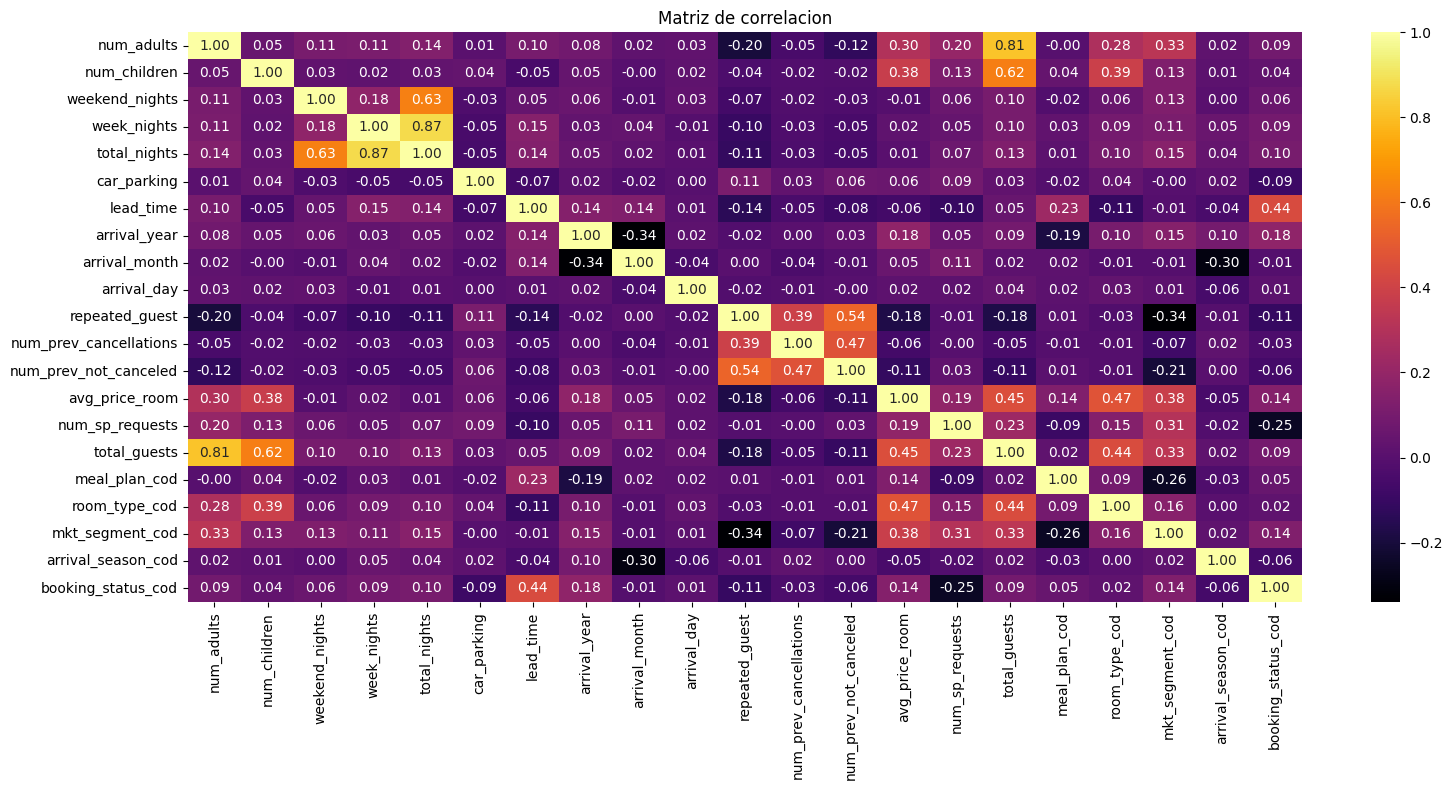

In [30]:
#GRAFICO MATRIZ DE CORRELACION
matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16,8))
sns.heatmap(matrix, fmt='.2f', annot=True, cmap='inferno')
plt.title('Matriz de correlacion')
plt.tight_layout()
plt.show()

#### Correlacion de variable ***booking_status*** con variables cuantitativas y ordinales

Se utiliza el ***coeficiente de correlacion punto biserial*** para determinar la relacion entre las variables cuantitativas y la variable de interes ***booking_status*** que es de tipo nominal dicotomica.

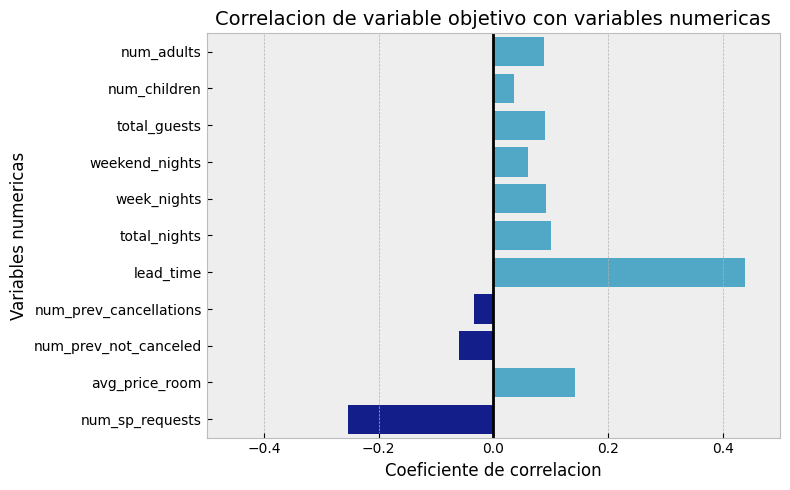

In [31]:
#GRAFICO DE CORRELACIONES DE PUNTO BISERIAL
Correlations(df, 'booking_status_cod', numeric_var, 'numericas').plot_biserial_point()

#### Correlacion de variable objetivo ***booking_status*** con variables de origen nominal

Se utiliza la ***coeficiente de contingencia*** para determinar la relacion entre las variables nominales y la variable de interes ***booking_status*** que es de tipo nominal dicotomica. Para ello se obtiene el estadisitico de prueba ***Chi cuadrado*** utilizando la libreria ***scipy*** para posteriormente obtener el coeficiente con la formula que se muestra acontinuacion:
$$
C = \sqrt{\frac{x^2}{N+x^2}}
$$
X²: Estadistico Chi²<br>
N: Cantidadad de observaciones totales<br>
C: coeficiente de contingencia<br>

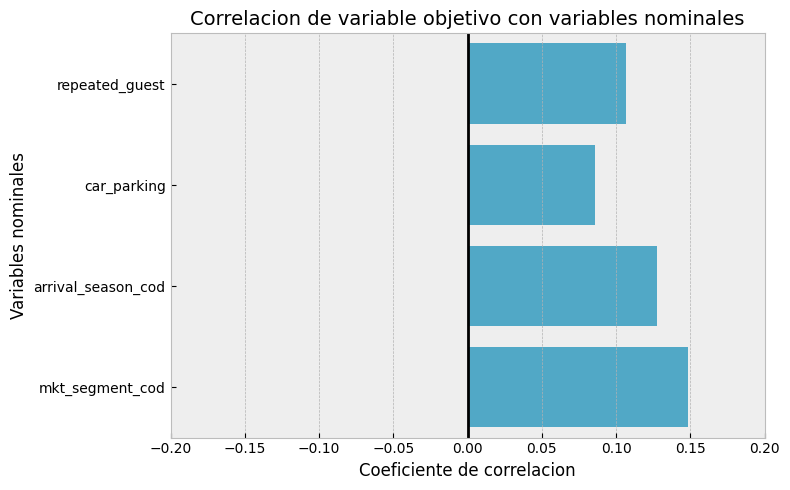

In [32]:
#GRAFICO DE COEFICIENTES DE CONTINGENCIA
Correlations(df, 'booking_status_cod', nominal_var, 'nominales').plot_contingency_coef()

### Graficos de exploracion

#### Comportamiento de la reservas

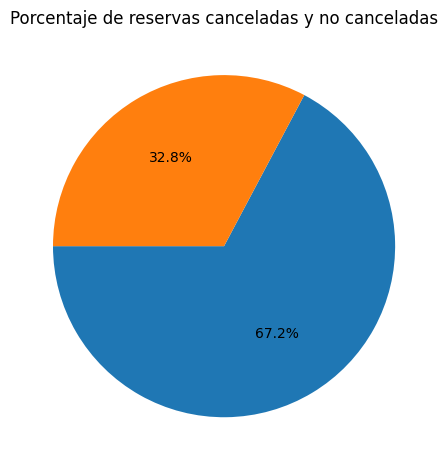

In [33]:
#GRAFICO DE TORTA RESERVAS CANCELADAS Y NO CANCELADAS
count = df.booking_status.value_counts()
plt.pie(count, autopct='%1.1f%%', startangle=180)
plt.title('Porcentaje de reservas canceladas y no canceladas')

plt.tight_layout()
plt.show()

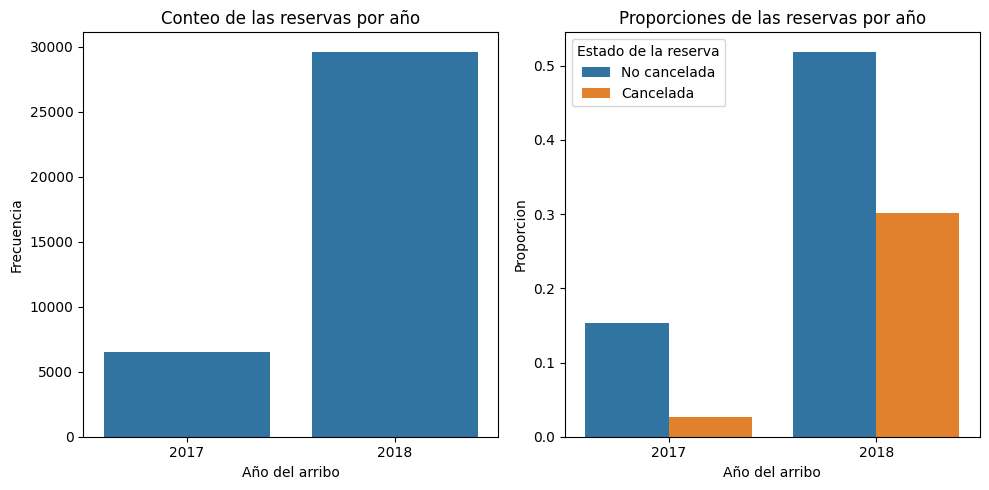

In [34]:
#COMPORTAMIENTO ANUAL DE LAS RESERVAS
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x=df.arrival_year,ax=ax[0])
ax[0].set_title('Conteo de las reservas por año')
ax[0].set_xlabel('Año del arribo')
ax[0].set_ylabel('Frecuencia')

sns.countplot(x=df.arrival_year,hue=df.booking_status, stat='proportion', ax=ax[1])
ax[1].set_title('Proporciones de las reservas por año')
ax[1].set_xlabel('Año del arribo')
ax[1].set_ylabel('Proporcion')
ax[1].get_legend().set_title('Estado de la reserva')

plt.tight_layout()
plt.show()

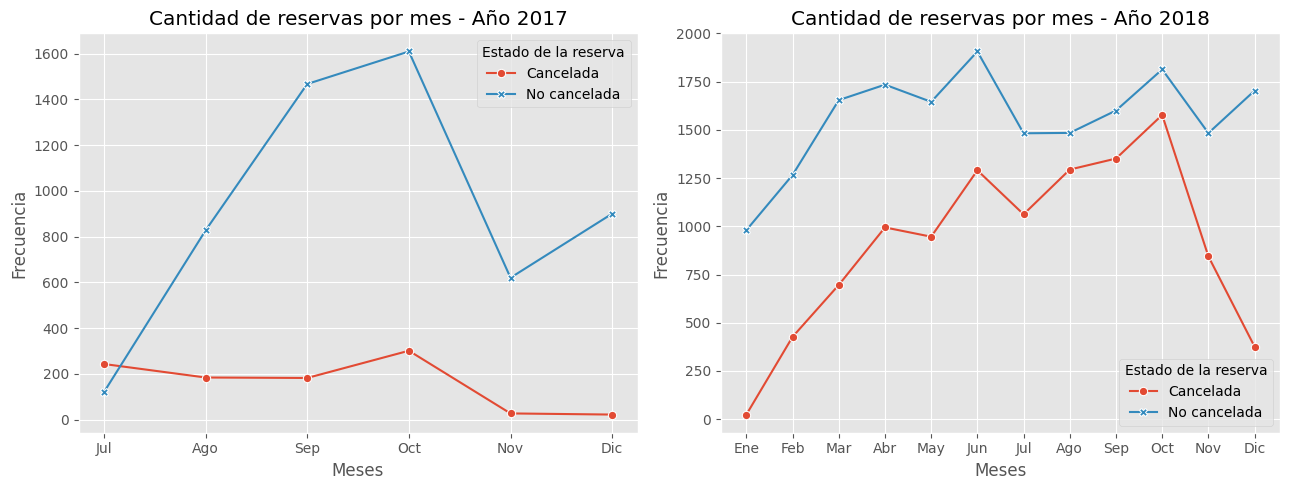

In [35]:
#COMPORTAMIENTO MENSUAL DE LAS RESERVAS
bookings = df.groupby(['arrival_year','arrival_month','booking_status'])['booking_status'].count().reset_index(name='count')
months = ['Ene','Feb','Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

#GRAFICO
mpl.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

#AÑO 2017
data=bookings.loc[bookings.arrival_year==2017]
sns.lineplot(data=data, x='arrival_month', y='count', hue='booking_status', ax=ax[0], style='booking_status', markers=True, dashes=False)
ax[0].set_title('Cantidad de reservas por mes - Año 2017')
ax[0].set_xlabel('Meses')
ax[0].set_xticks(ticks=data.arrival_month.unique(), labels=months[6:])
ax[0].set_ylabel('Frecuencia')
ax[0].get_legend().set_title('Estado de la reserva')

#AÑO 2018
data=bookings.loc[bookings.arrival_year==2018]
sns.lineplot(data=data, x='arrival_month', y='count', hue='booking_status', ax=ax[1], style='booking_status', markers=True, dashes=False)
ax[1].set_title('Cantidad de reservas por mes - Año 2018')
ax[1].set_xlabel('Meses')
ax[1].set_xticks(ticks=data.arrival_month.unique(), labels=months)
ax[1].set_ylabel('Frecuencia')
ax[1].get_legend().set_title('Estado de la reserva')

plt.tight_layout()
plt.show()
mpl.style.use('default')

#### Distribucion de la variable ***avg_price_room***

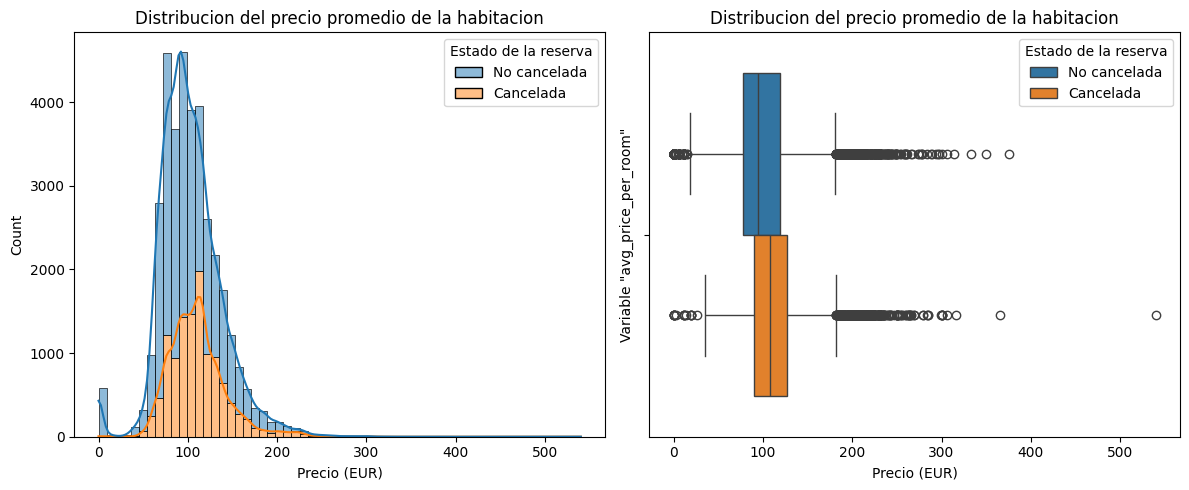

In [36]:
#DISTRIBUCION VARIABLE AVG_PRICE_ROOM
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.avg_price_room, hue=df.booking_status, multiple='stack',bins=60, kde=True, ax=ax[0])
ax[0].set_title('Distribucion del precio promedio de la habitacion')
ax[0].set_xlabel('Precio (EUR)')
ax[0].get_legend().set_title('Estado de la reserva')

sns.boxplot(x=df.avg_price_room, hue=df.booking_status, ax=ax[1])
ax[1].set_title('Distribucion del precio promedio de la habitacion')
ax[1].set_xlabel('Precio (EUR)')
ax[1].set_ylabel('Variable "avg_price_per_room"')
ax[1].get_legend().set_title('Estado de la reserva')
plt.tight_layout()
plt.show()

#### Distribucion de la variable ***lead_time***

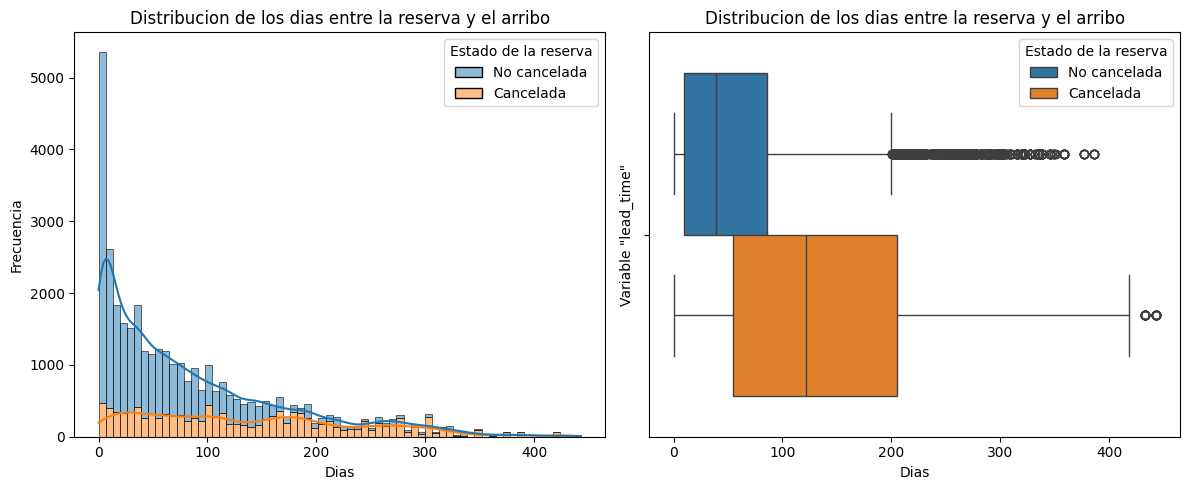

In [37]:
#DISTRIBUCION VARIABLE LEAD_TIME
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.lead_time, hue=df.booking_status, multiple='stack', kde=True, ax=ax[0])
ax[0].set_title('Distribucion de los dias entre la reserva y el arribo')
ax[0].set_xlabel('Dias')
ax[0].set_ylabel('Frecuencia')
ax[0].get_legend().set_title('Estado de la reserva')

sns.boxplot(x=df.lead_time, hue=df.booking_status, ax=ax[1])
ax[1].set_title('Distribucion de los dias entre la reserva y el arribo')
ax[1].set_xlabel('Dias')
ax[1].set_ylabel('Variable "lead_time"')
ax[1].get_legend().set_title('Estado de la reserva')
plt.tight_layout()
plt.show()

#### Distribucion de la variable ***num_sp_requests***

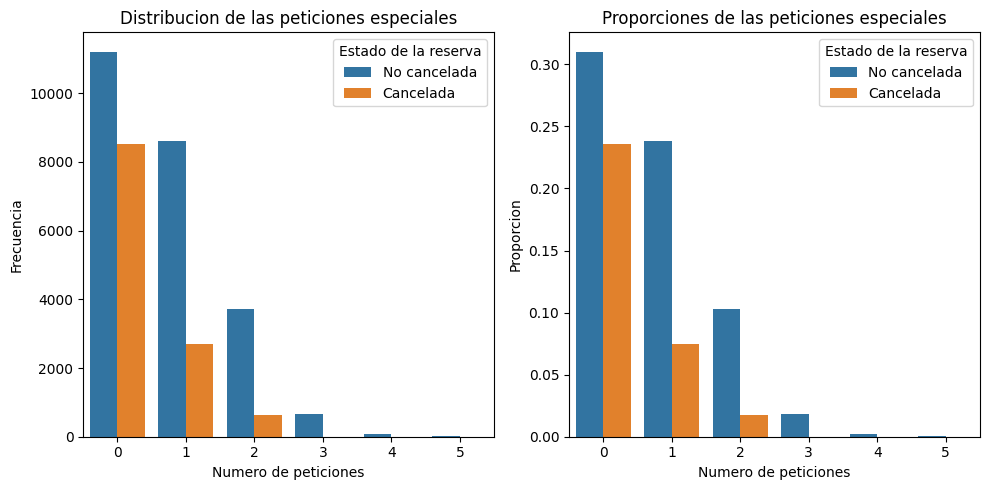

In [38]:
#DISTRIBUCION DE LAS PETICIONES ESPECIALES
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x=df.num_sp_requests,ax=ax[0], hue=df.booking_status)
ax[0].set_title('Distribucion de las peticiones especiales')
ax[0].set_xlabel('Numero de peticiones')
ax[0].set_ylabel('Frecuencia')
ax[0].get_legend().set_title('Estado de la reserva')

sns.countplot(x=df.num_sp_requests,hue=df.booking_status, stat='proportion', ax=ax[1])
ax[1].set_title('Proporciones de las peticiones especiales')
ax[1].set_xlabel('Numero de peticiones')
ax[1].set_ylabel('Proporcion')
ax[1].get_legend().set_title('Estado de la reserva')

plt.tight_layout()
plt.show()

#### Distribucion de la variable ***mkt_segment***

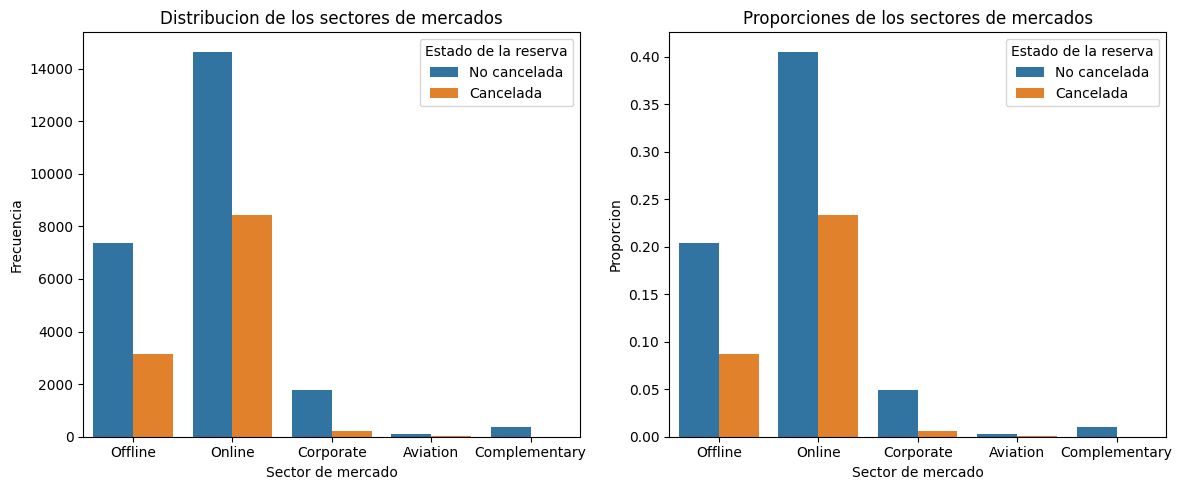

In [39]:
#DISTRIBUCION DE LOS SECTORES DE MERCADO
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x=df.mkt_segment,ax=ax[0], hue=df.booking_status)
ax[0].set_title('Distribucion de los sectores de mercados')
ax[0].set_xlabel('Sector de mercado')
ax[0].set_ylabel('Frecuencia')
ax[0].get_legend().set_title('Estado de la reserva')

sns.countplot(x=df.mkt_segment,hue=df.booking_status, stat='proportion', ax=ax[1])
ax[1].set_title('Proporciones de los sectores de mercados')
ax[1].set_xlabel('Sector de mercado')
ax[1].set_ylabel('Proporcion')
ax[1].get_legend().set_title('Estado de la reserva')

plt.tight_layout()
plt.show()

#### Analisis bivariado: ***lead_time*** vs ***avg_price_room*** 

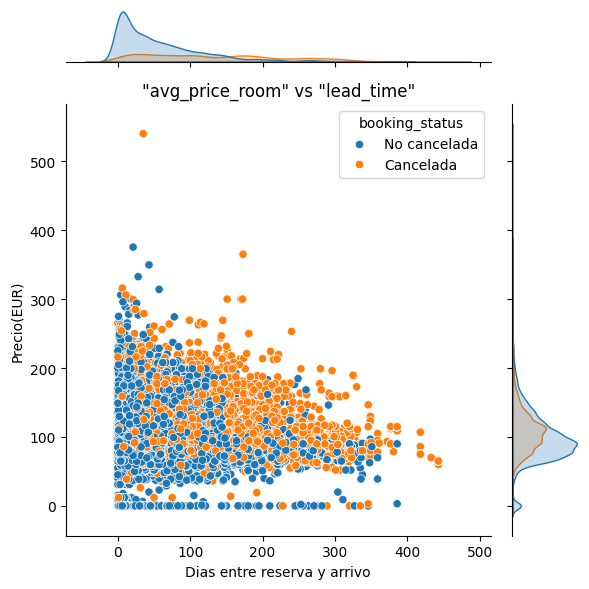

In [40]:
#GRAFICO DE RELACION ENTRE VARIABLES AVG_PRICE_ROOM Y LEAD_TIME
sns.jointplot(x=df.lead_time, y=df.avg_price_room, hue=df.booking_status)
plt.title('"avg_price_room" vs "lead_time"')
plt.ylabel('Precio(EUR)')
plt.xlabel('Dias entre reserva y arrivo')
plt.tight_layout()
plt.show()

#### Analisis bivariado: ***lead_time*** vs ***num_sp_requests***

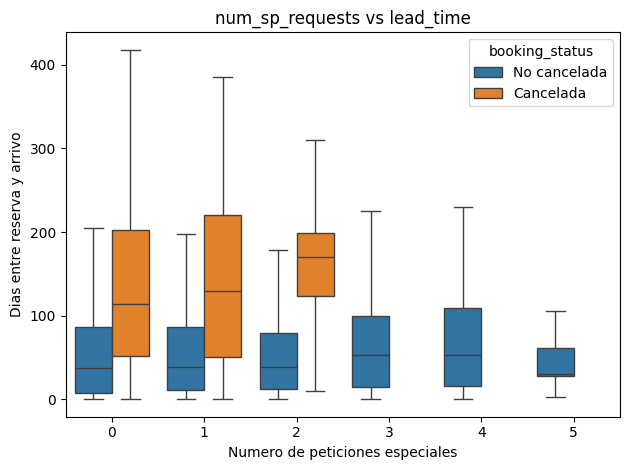

In [41]:
sns.boxplot(y=df.lead_time, x=df.num_sp_requests, hue=df.booking_status, showfliers=False)
plt.title('num_sp_requests vs lead_time')
plt.xlabel('Numero de peticiones especiales')
plt.ylabel('Dias entre reserva y arrivo')
plt.tight_layout()
plt.show()

#### Analisis bivariado: ***lead_time*** vs ***mkt_segment***

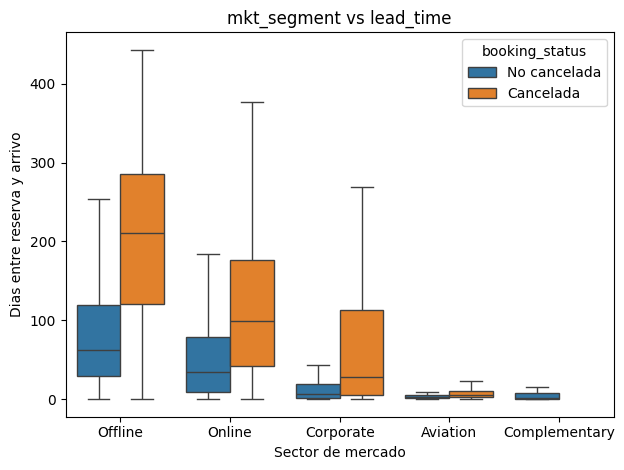

In [42]:
sns.boxplot(y=df.lead_time, x=df.mkt_segment, hue=df.booking_status, showfliers=False)
plt.title('mkt_segment vs lead_time')
plt.xlabel('Sector de mercado')
plt.ylabel('Dias entre reserva y arrivo')
plt.tight_layout()
plt.show()

#### Analisis multivariado: ***avg_price_room*** VS ***lead_time*** VS ***num_sp_requests***

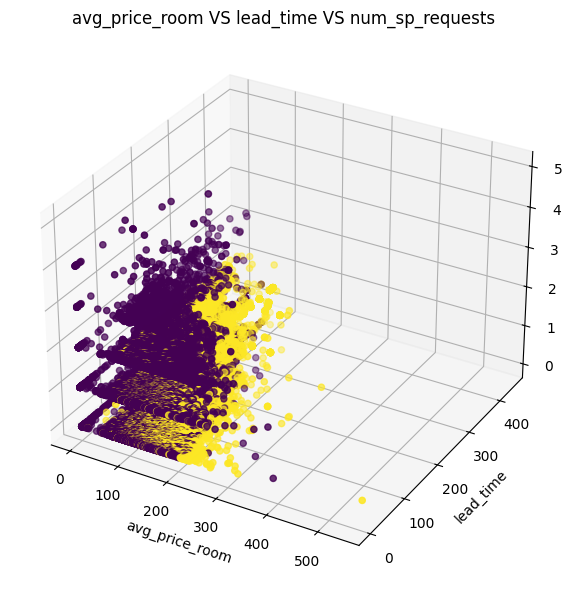

In [43]:
#avg_price_room VS lead_time VS num_sp_requests
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,6))
ax.scatter(df.avg_price_room, df.lead_time, df.num_sp_requests, c=df.booking_status_cod)
ax.set(xlabel='avg_price_room',
       ylabel='lead_time',
       zlabel='num_sp_requests')
plt.title('avg_price_room VS lead_time VS num_sp_requests')
plt.tight_layout()
plt.show()

#### Analisis multivariado: ***avg_price_room*** VS ***lead_time*** VS ***mkt_segment***

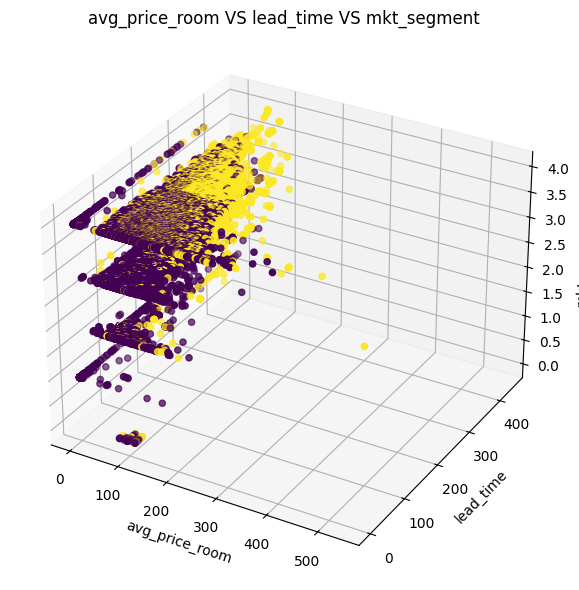

In [44]:
#avg_price_room VS lead_time VS mkt_segment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,6))
ax.scatter(df.avg_price_room, df.lead_time, df.mkt_segment_cod, c=df.booking_status_cod)
ax.set(xlabel='avg_price_room',
       ylabel='lead_time',
       zlabel='mkt_segment')
plt.title('avg_price_room VS lead_time VS mkt_segment')
plt.tight_layout()
plt.show()

## Pre-Procesamiento

### Imputacion de valores outliers de la variable ***avg_price_room***

Esta variable describe el precio promedio en euros de la habitacion rentada. El metodo ***describe()*** en la celda posterior, muestra el valor ***cero*** como minimo de la variable, lo cual no tiene sentido para este caso. Tambien se observa un valor maximo que se despega bastante del 3er cuartil lo cual puede que sea un indicio de la presencia de valores atipicos. En esta seccion se evaluaran los casos mencionados y la forma en que estos seran tratados.

In [45]:
#INFORMACION DE LA VARIABLE
df.avg_price_room.describe()

count    36133.000000
mean       103.509164
std         35.062636
min          0.000000
25%         80.390000
50%         99.480000
75%        120.120000
max        540.000000
Name: avg_price_room, dtype: float64

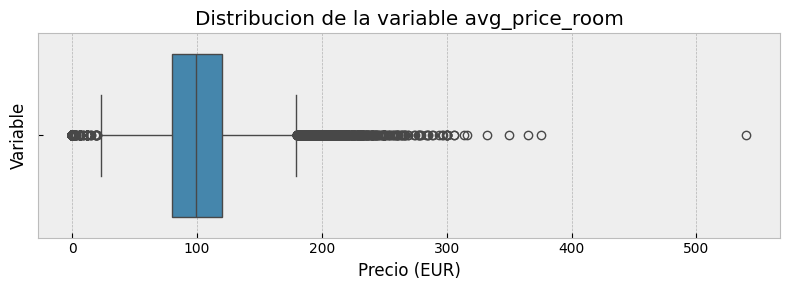

In [46]:
#BOXPLOT PARA IDENTIFICAR OUTLIERS
plt.figure(figsize=(8,3))
mpl.style.use('bmh')
sns.boxplot(x=df.avg_price_room)
plt.title(f'Distribucion de la variable avg_price_room')
plt.xlabel('Precio (EUR)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')

Para la deteccion de valores outliers se utilizara el algoritmo ***MCD (Minimun Covariance Determinant)*** de la librería ***scikit-learn***. Luego se entrenara un modelo de ***ML*** a fines de predecir los precios correctos para aquellos valores que fueron clasificados como outliers por el ***MCD***.

In [47]:
#SE IMPORTA MODELO DETECCION DE OUTLIERS
from sklearn.covariance import EllipticEnvelope

#SE RESETEAN INDICES PARA EVITAR INCONCISTENCIAS
df = df.reset_index()

#SE INSTANCIA EL MODELO Y SE REALIZA PREDICCION
cov_det = EllipticEnvelope(contamination=0.05)
predict = cov_det.fit_predict(df.avg_price_room.values.reshape(-1,1))

#SE CREA DATAFRAME DE REFERENCIA PARA PRECIOS OUTLIERS
predict = pd.concat([df.avg_price_room,
                     pd.Series(predict.flatten(), name='is_outlier')],
                     axis=1)

#CONTEO DE OUTLIERS
print(f'Cantidad de outliers encontrados: {predict.loc[predict.is_outlier == -1].shape[0]}')

Cantidad de outliers encontrados: 1784


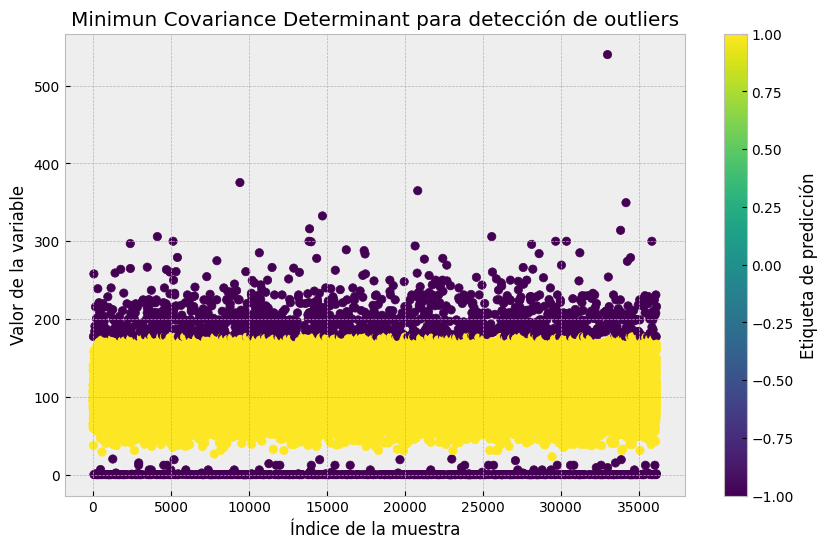

In [48]:
#REPRESENTACION GRAFICA DE OUTLIERS
mpl.style.use('bmh')
plt.figure(figsize=(10,6))
plt.scatter(predict.index, predict.avg_price_room, c=predict.is_outlier, cmap='viridis')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valor de la variable')
plt.title('Minimun Covariance Determinant para detección de outliers')
plt.colorbar(label='Etiqueta de predicción')
plt.show()
mpl.style.use('bmh')

#### Feature Engineering para entrenar modelo de prediccion de precios outliers

In [49]:
#SE CREA DATAFRAME COMPLEMENTARIO PARA TESTEAR MODELO
_df = pd.concat([df, predict.is_outlier], axis=1)

#ENCODING DE VARIABLES CUALITATIVAS QUE CORRELACIONAN CON LA VARIABLE A PREDECIR
var_dummy = pd.get_dummies(_df[['mkt_segment','room_type']], dtype=int)

In [50]:
#LISTA DE VARIABLES DE "_df" IMPLICADAS EN LA SELECCION 
vars = [ 'booking_status_cod','lead_time','total_guests', 'arrival_year',
         'num_sp_requests', 'is_outlier','avg_price_room']

#UNION DE TODAS LAS VARIABLES IMPLICADAS EN LA SELECCION
_df = pd.concat([var_dummy, _df[vars]], axis=1)

#LISTA DE VARIABLES PREDICTIVAS
vars = list(_df.columns)[:-2]

#SELECCION DE VARIABLES PREDICTIVAS PARA ENTRENAMIENTO
x = _df.loc[_df.is_outlier == 1, vars]
y = _df.loc[_df.is_outlier == 1, 'avg_price_room']

#OBSERVACIONES A PREDECIR
x_outlier = _df.loc[_df.is_outlier == -1, vars]

#### Entrenamiento de modelo ***Random Forest Regressor*** para imputar outliers

En esta caso se utilizara el algoritmo ***Random Forest Regressor*** ya que si bien no se muestra por una cuestion de agilidad, entre varios algoritmos este ha dado del mejor resultado. 

In [51]:
#IMPORTACION DE LIBRERIAS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [52]:
#SELECCION DE DATOS PARA ENTRENAMIENTO Y TEST
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#INSTANCIA, ENTRENAMIENTO Y PREDICCION
model = RandomForestRegressor(max_depth=12, max_features=0.5, n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [53]:
#METRICAS DE REGRESION
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 378.4133710739239
Root Mean Squared Error (RMSE): 19.45284994734509
R^2 Score: 0.48299774576418997


#### Imputacion y analisis

In [54]:
#PREDICCION DE PRECIOS
y_pred = model.predict(x_outlier)

#SE AGREGA AL DATAFRAME PRINCIPAL
_df.loc[_df.is_outlier == -1, 'avg_price_room'] = y_pred

#SE REEMPLAZAN LOS VALORES DEL DATAFRAME PRINCIPAL
df.avg_price_room = _df.avg_price_room

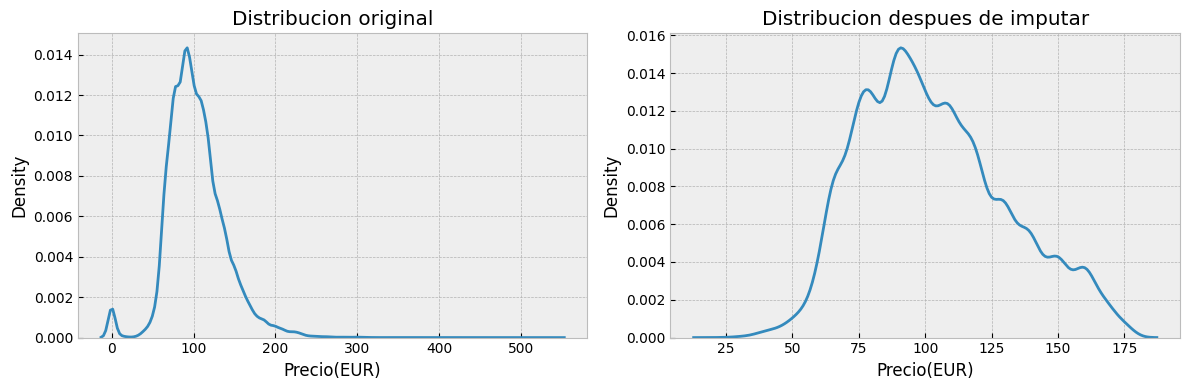

In [55]:
#GRAFICO DE COMPARACION DE DISTRIBUCIONES
plt.style.use("bmh")    
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))

#GRAFICO 1
sns.kdeplot(x=predict.avg_price_room, ax=ax[0])
ax[0].set_title('Distribucion original')
ax[0].set_xlabel('Precio(EUR)')
 
#GRAFICO 2
sns.kdeplot(data=df.avg_price_room, ax=ax[1])
ax[1].set_xlabel('Precio(EUR)')
ax[1].set_title(f'Distribucion despues de imputar')

#PLOTEO
plt.tight_layout()
plt.show()
plt.style.use("default")

In [56]:
#INFO VARIABLE ANTES DE IMPUTAR
print('-----Antes de imputar-----')
DescrStat.get_var_data(predict.avg_price_room)

-----Antes de imputar-----


median        99.4800
mean         103.5092
mode          65.0000
std           35.0626
variance    1229.3884
skew           0.6760
kurtosys       3.1577
dtype: float64

In [57]:
#INFO VARIABLE DESPUES DE IMPUTAR
print('-----Despues de imputar-----')
DescrStat.get_var_data(df.avg_price_room)

-----Despues de imputar-----


median       99.9000
mean        103.0559
mode         65.0000
std          27.7816
variance    771.8190
skew          0.4387
kurtosys     -0.4077
dtype: float64

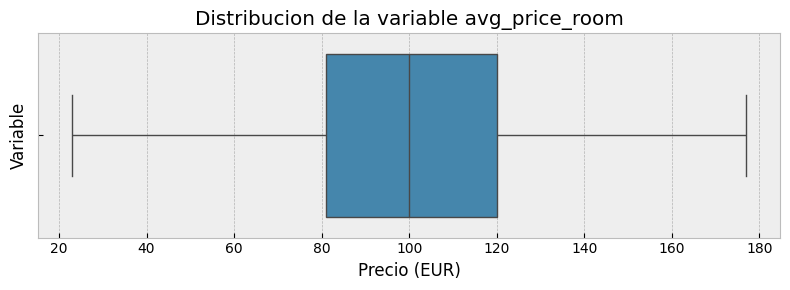

In [58]:
#BOXPLOT PARA IDENTIFICAR OUTLIERS
plt.figure(figsize=(8,3))
mpl.style.use('bmh')
sns.boxplot(x=df.avg_price_room)
plt.title(f'Distribucion de la variable avg_price_room')
plt.xlabel('Precio (EUR)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')

In [59]:
#SE LIBERAN RECURSOS
del _df
del predict
del cov_det
del model
del x, y
del X_train, X_test, y_train, y_test
del y_pred

#INFO
df.avg_price_room.describe()

count    36133.00000
mean       103.05591
std         27.78163
min         23.00000
25%         81.00000
50%         99.90000
75%        120.00000
max        177.00000
Name: avg_price_room, dtype: float64

### Codificacion de variables cualitativas

Basado en el proceso de **Exploratory Data Analysis** se selecciona la variable **mkt_segment** para ser codificada y utilizada como variable predictiva dada su correlatividad con la variable target.

In [60]:
var_dummy = pd.get_dummies(df.mkt_segment, dtype=int)
var_dummy.head(3)

,Aviation,Complementary,Corporate,Offline,Online
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1


## Modelado

En esta seccion se aborda el proceso de preparacion, seleccion, entrenamiento y validacion de los algoritmos de machine learning que intentaran resolver la problematica planteada a lo largo del documento.<br>
En primer lugar se realizaran todas las transformaciones necesarias en las variables para poder obtener su mayor poder predictivo, luego se seleccionaran todas aquellas variables que se consideren explicativas para predecir la variable objetivo.<br>

Luego se procede a entrenar, testear y validar los siguientes modelos:
- KNN
- Tree Decision
- Random Forest
- XG-Boost

### Feature engineering

En este caso las variables que representan a la fecha de arribo se dividen en tres, estas variables son ***arrival_year***, ***arrival_month*** y ***arrival_day*** las cuales describen el año, mes y dia del arribo respectivamente. En el ***Dataset*** sobre el cual se basa este proyecto, la variable que representa al año solo adquiere dos valores, 2017 y 2018, propio de los datos historicos proporcionados por el cliente. Y como el modelo sera utilizado en años posteriores a los disponibles para el entrenamiento, he decidido omitir esta variable para predecir la variable de interes, ya que esto podria ponderar en las metricas de manera positiva, pero al momento de desplegar el modelo los valores de los años que reciba en etapa de produccion serian diferentes y esto podria producir un rendimiento mas bajo de lo esperado.<br>
En base a la decision explicada anteriormente, se toman las variables representativas al mes y dia a fines de reducir su dimensionalidad con el algoritmo ***PCA*** a una sola variable y comparar como afecta al modelo en relacion a metricas de anteriores entregas.

In [61]:
#SE ESTANDARIZAN VARIABLES (µ=0; σ=1)
scaler = StandardScaler()
date_vars = scaler.fit_transform(df[['arrival_day', 'arrival_month']])

#REDUCCION DE DIMENSIONALIDAD
pca = PCA(n_components=1)
reduce_vars = pca.fit_transform(date_vars)
reduce_vars = pd.Series(reduce_vars.flatten(), name='reduce_var')

#RESULTADO
print(f'Varianza explicada por la variable reducida: {pca.explained_variance_ratio_}')

Varianza explicada por la variable reducida: [0.52167988]


Se realiza una transformacion sobre las variables **lead_time** y **avg_price_room.** He decidido estandarizar ambas variables **(µ=0; σ=1)** ya que ambas tienen una escala de amplitud considerablemente mayor al resto.

In [62]:
#SE ESTANDARIZAN VARIABLES (µ=0; σ=1)
std_vars = pd.DataFrame(StandardScaler().fit_transform(df[['lead_time', 'avg_price_room']]),
                        columns=['lead_time', 'avg_price_room'])

#RESULTADO
std_vars.head(3)

,lead_time,avg_price_room
0,1.615007,-1.369842
1,-0.932939,0.130451
2,-0.979477,-1.549819


Ya realizadas las transformaciones necesarias se procede a seleccionar las variables que seran utilizadas para predecir la variable objetivo.

In [63]:
#SELECCION DE VARIABLES PARA EL ENTRENAMIENTO
vars = ['num_sp_requests','car_parking','num_children',
        'weekend_nights', 'week_nights','room_type_cod']

x = pd.concat([df[vars], std_vars, reduce_vars,var_dummy], axis=1)

y = df.booking_status_cod

In [64]:
#SPLIT DE LOS DATOS PARA ENTRENAR Y VALIDAR
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=42)

### Etrenamiento, metricas y validacion de modelos

#### KNN

In [65]:
#IMPORTACION DE LIBRERIA
from sklearn.neighbors import KNeighborsClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)

#LISTA PARA ALOJAR METRICAS
metrics_list = []

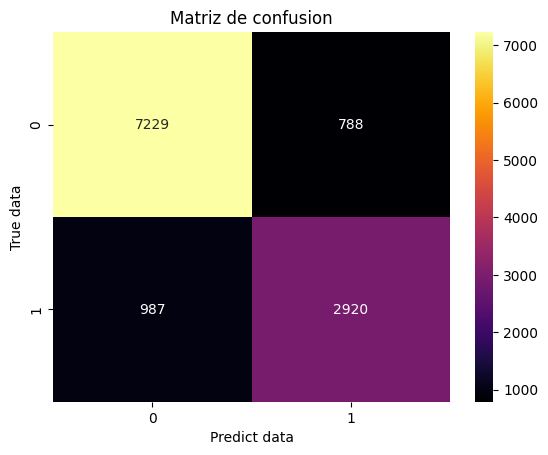

In [66]:
#GRAFICO DE MATRIZ DE CONFUSION
Metrics().plot_matrix_confusion(y_test, y_pred)

In [67]:
#REPORTE DE METRICAS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8017
           1       0.79      0.75      0.77      3907

    accuracy                           0.85     11924
   macro avg       0.83      0.82      0.83     11924
weighted avg       0.85      0.85      0.85     11924



In [68]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob).round(4)}')

Score curva ROC: 0.8969


In [69]:
#SE AGREGA METRICA A LA LISTA
metrics_list.append(Metrics().get_metrics('KNN', y_test, y_pred, y_prob))

#### Tree decision

In [70]:
#IMPORTACION DE LIBRERIA
from sklearn.tree import DecisionTreeClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)

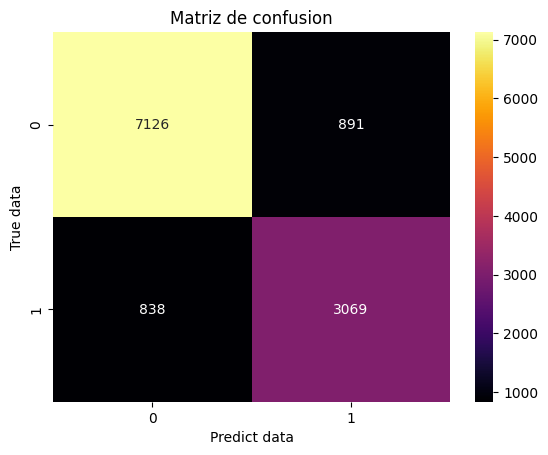

In [71]:
#GRAFICO DE MATRIZ DE CONFUSION
Metrics().plot_matrix_confusion(y_test, y_pred)

In [72]:
#REPORTE DE METRICAS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8017
           1       0.78      0.79      0.78      3907

    accuracy                           0.85     11924
   macro avg       0.83      0.84      0.84     11924
weighted avg       0.86      0.85      0.86     11924



In [73]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob).round(4)}')

Score curva ROC: 0.8397


In [74]:
#SE AGREGA METRICA A LA LISTA
metrics_list.append(Metrics().get_metrics('TREE', y_test, y_pred, y_prob))

#### Random Forest

In [75]:
#IMPORTACION DE LIBRERIA
from sklearn.ensemble import RandomForestClassifier

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = RandomForestClassifier()
model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)

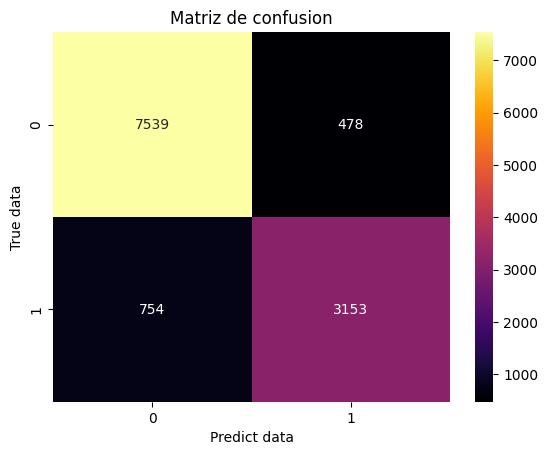

In [76]:
#GRAFICO DE MATRIZ DE CONFUSION
Metrics().plot_matrix_confusion(y_test, y_pred)

In [77]:
#REPORTE DE METRICAS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      8017
           1       0.87      0.81      0.84      3907

    accuracy                           0.90     11924
   macro avg       0.89      0.87      0.88     11924
weighted avg       0.90      0.90      0.90     11924



In [78]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob).round(4)}')

Score curva ROC: 0.9495


In [79]:
#SE AGREGA METRICA A LA LISTA
metrics_list.append(Metrics().get_metrics('RF', y_test, y_pred, y_prob))

#### XG-Boosting

In [80]:
#IMPORTACION DE MODELOS
from xgboost import XGBClassifier

model = XGBClassifier()

#ENTRENAMIENTO
model.fit(X_train,y_train)

#PREDICCION
y_pred = model.predict(X_test)

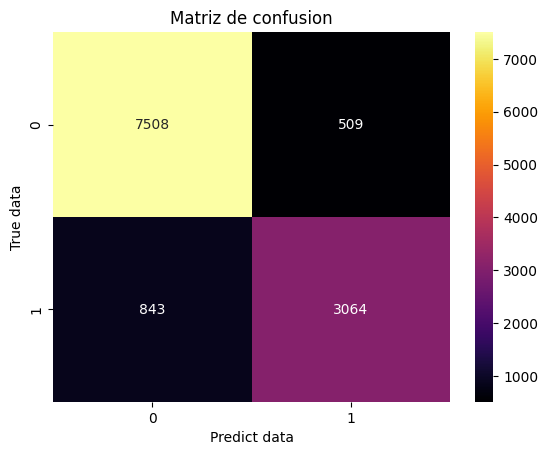

In [81]:
#GRAFICO MATRIZ DE CONFUSION
Metrics().plot_matrix_confusion(y_test, y_pred)

In [82]:
#REPORTE DE METRICAS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8017
           1       0.86      0.78      0.82      3907

    accuracy                           0.89     11924
   macro avg       0.88      0.86      0.87     11924
weighted avg       0.89      0.89      0.89     11924



In [83]:
#SCORE CURVA ROC
y_prob = model.predict_proba(X_test)[:,1]
print(f'Score curva ROC: {roc_auc_score(y_test, y_prob):.4f}')

Score curva ROC: 0.9421


In [84]:
#SE AGREGA METRICA A LA LISTA
metrics_list.append(Metrics().get_metrics('XGB', y_test, y_pred, y_prob))

#### Analisis de metricas, mejora de modelo y validacion cruzada

En esta estapa se visualizan las metricas obtenidas en los modelos entrenados anteriormente y se seleccionara aquel con mejores resultados a fines de mejorar dicho modelo y obtener los mejores resultados posibles. 

In [85]:
#VISUALIZACION DE METRICAS
pd.DataFrame(metrics_list)

,model,accuracy,roc_score,precision_0,precision_1,recall_0,recall_1,f1_score_0,f1_score_1
0,KNN,0.8511,0.8969,0.8799,0.7875,0.9017,0.7474,0.8907,0.7669
1,TREE,0.8550,0.8397,0.8948,0.7750,0.8889,0.7855,0.8918,0.7802
2,RF,0.8967,0.9495,0.9091,0.8684,0.9404,0.8070,0.9245,0.8366
3,XGB,0.8866,0.9421,0.8991,0.8575,0.9365,0.7842,0.9174,0.8193


Como se ve anteriormente en la tabla, las mejores metricas se han obtenido mediante el algoritmo ***Random Forest Classifier***. Posteriormente se intentara mejorar este modelo y se lo sometera a validacion cruzada para evaluar su precision expuesto a diferentes sets de entrenamiento y test.

In [86]:
#GRILLA DE HIPERPARAMETROS 
param_grid = {
    'criterion' : ['entropy','gini'],
    'n_estimators': [200, 300],
    'max_depth': [10, 18, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'random_state': [42]
}

#INSTANCIA Y ENTRENAMIENTO DEL MODELO
model = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=param_grid,
                     cv=3, n_jobs=-1,
                     scoring='accuracy')

model.fit(X_train, y_train)

#PREDICCION
y_pred = model.predict(X_test)

In [87]:
#MEJORES PARAMETROS
model.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300,
 'random_state': 42}

Se comparan las metricas entre el modelo por defecto y el modelo con tunning de hyperparametros, si bien la mejora no es significativa ah logrado superar las metricas del modelo por defecto. Seguidamente se pueden observar estos valores

In [88]:
#COMPARACION DE METRICAS ENTRE RF Y RF CON TUNNING DE HYPERPARAMETROS
y_prob = model.predict_proba(X_test)[:,1]
comparison = [metrics_list[2], Metrics().get_metrics('RF_GridSearch',y_test, y_pred, y_prob)]
pd.DataFrame(comparison)

,model,accuracy,roc_score,precision_0,precision_1,recall_0,recall_1,f1_score_0,f1_score_1
0,RF,0.8967,0.9495,0.9091,0.8684,0.9404,0.8070,0.9245,0.8366
1,RF_GridSearch,0.8978,0.9509,0.9086,0.8727,0.9427,0.8055,0.9254,0.8377


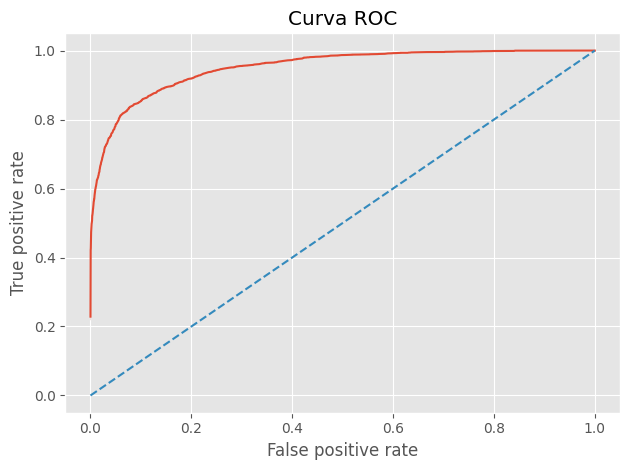

In [89]:
#CURVA ROC RF_GRIDSEARCH
Metrics.plot_roc_curve(y_test, y_prob)

Ahora pone aprueba mediante ***validacion cruzada*** el modelo con los mejores hyperparametros segun ***GridSeach***

In [90]:
#VALIDACION CRUZADA
from sklearn.model_selection import StratifiedKFold

#INSTANCIA DEL MODELO CON LOS PARAMETROS DE GRIDSEARCH
model = RandomForestClassifier( max_depth=20,
                                criterion='gini',
                                n_estimators=300,
                                min_samples_leaf=1,
                                min_samples_split=5,
                                bootstrap=False,
                                random_state=42)

#SE INSTANCIA MODELO DE VALIDACION CRUZADA
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#DIVICION DE DE DATOS PARA ITERACIONES
train_test = list(skf.split(x,y))

#LISTA PARA GUARDAR METRICAS
accuracies = []

#EJECUCION DE LA LOGICA DE MODELO
for k in range(skf.get_n_splits(x,y)):
    #Separacion de datos para train y test
    train, test = train_test[k]
    X_train, y_train, X_test, y_test = x.iloc[train], y.iloc[train], x.iloc[test], y.iloc[test]

    #Entrenamiento y prediccion
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Guardado de resultados
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy iteracion {k+1}: {accuracy:.4f}')

#PROMEDIO DE ACCURACY CV
print(f'Accuracy promedio: {np.array(accuracies).mean():.4f}')

Accuracy iteracion 1: 0.8935
Accuracy iteracion 2: 0.8892
Accuracy iteracion 3: 0.8907
Accuracy iteracion 4: 0.8969
Accuracy iteracion 5: 0.8909
Accuracy promedio: 0.8922


En esta evaluacion de metricas, utilizando la validacion simple y la validacion cruzada con el metodo Stratified k-fold se pudo observar que los resultados varian de la siguiente manera:
- Precision de validacion simple = 0.8978
- Precision promedio de validacion cruzada = 0.8922
- Diferencia = 0.0056

Los resultados expresados muestran que el modelo es estable, ya que la metrica no varió demasiado en las diferentes validaciones. Tambien se entiende por estos resultados que el modelo no se sobreajusta, ya que si esto pasara las metricas deberian ser bastante diferentes.

## Conclusion

Después del análisis de cada etapa de este proyecto y alineado con la hipótesis inicial, se han identificado tres variables que destacan sobre las demás al momento de clasificar las reservas que serán canceladas o no. Estas variables son:
- Tiempo entre la reserva y la fecha de llegada.
- Cantidad de solicitudes especiales realizadas por los clientes.
- Segmento de mercado.

Además, se observa que el modelo de clasificación entrenado ha mostrado un mejor desempeño al predecir las reservas que no serán canceladas, lo que contradice parcialmente nuestra hipótesis original. Este hallazgo sugiere que, si bien algunas variables son predictivas para las cancelaciones, el modelo tiene una mayor capacidad para identificar las reservas que se mantendrán firmes.
